# Taller 7 Optimizacion Convexa

Ruben Dario Rodriguez Moreno - 2181969

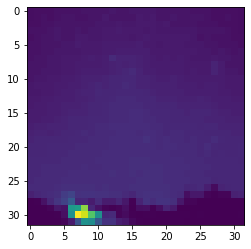

In [122]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./cielo.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (32, 32), interpolation=cv2.INTER_AREA)

plt.imshow(resized)

In [123]:
def softThreshold(x, lmba):
    if x > lmba:
        return x - lmba
    elif abs(x) <= lmba:
        return 0
    elif x < -lmba:
        return x + lmba

softThreshold = np.vectorize(softThreshold)


def admm(H, Y, rho, lmba, iteraciones,dim):
    
    x = np.zeros((dim, 1))
    z = np.zeros((dim, 1))
    u = np.zeros((dim, 1))
    
    for i in range(iteraciones):
        x = np.linalg.inv((H.T@H + (1/rho)*np.eye(dim)))@(H.T@Y + (1/rho)*(z - u))
        z = softThreshold(x + u, lmba)
        u = u + (1/rho)*(z - x)
        
    return x

#Noiseless-case


rho = [1,2,3,4,10]


lmba = 0.1

iteraciones = 10

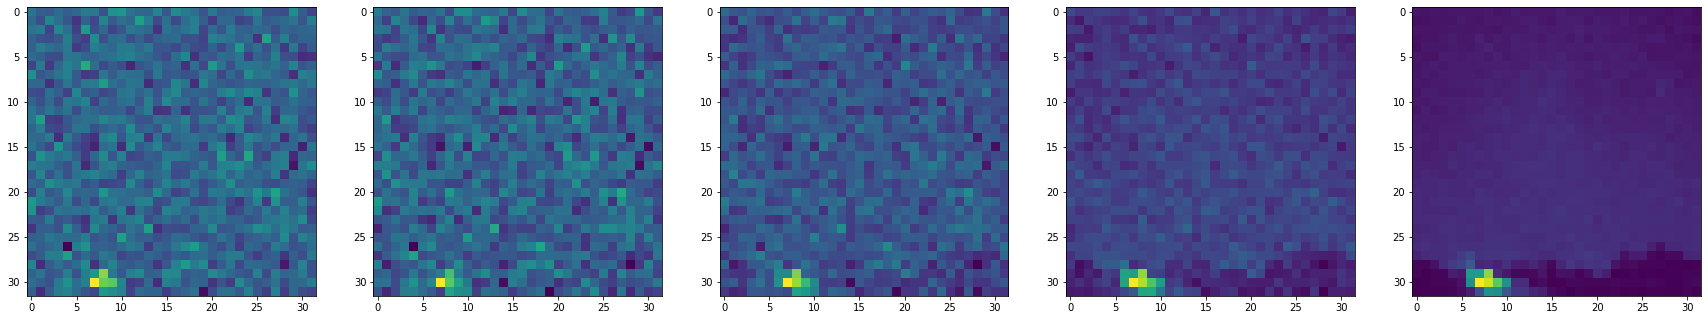

In [127]:
#@title H -> m=n

resized = cv2.resize(gray, (32, 32), interpolation=cv2.INTER_AREA)
x = resized.reshape(1, -1).T.astype(np.double)/255
H = np.random.uniform(0, 1, size=(32**2, 32**2))
Y = (H@x)
rho = [1,2,3,4,10]
lmba = 0.1

plt.figure(figsize=(30,10))
for i in range(5):
  recuperada = admm(H, Y, rho[i], lmba, 20,32**2)
  recuperada = recuperada.reshape(32, 32)
  plt.subplot(1,5,i+1)
  plt.imshow(recuperada)

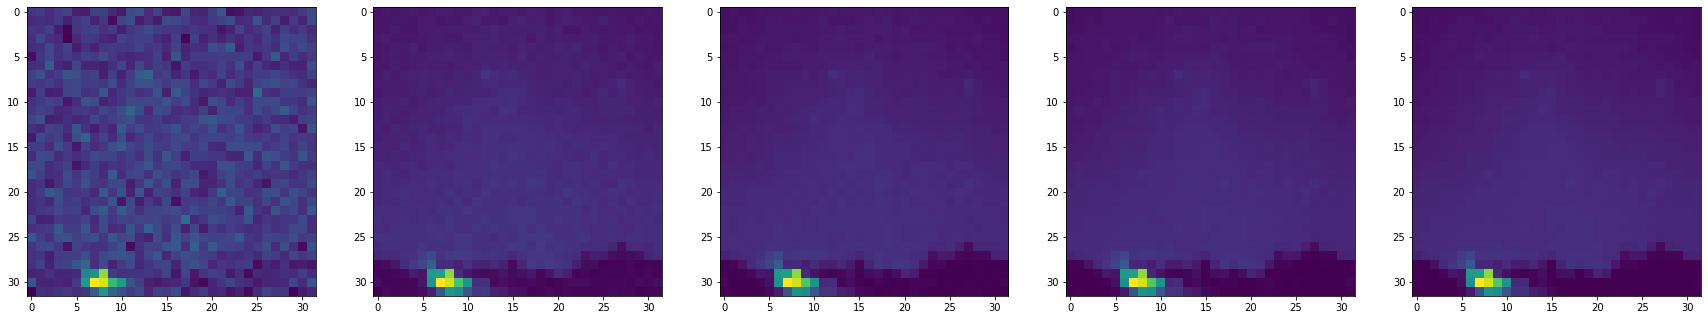

In [128]:
#@title H -> m>n
resized = cv2.resize(gray, (32, 32), interpolation=cv2.INTER_AREA)
x = resized.reshape(1, -1).T.astype(np.double)/255
H = np.random.uniform(0, 1, size=(38**2, 32**2))
Y = (H@x)
rho = [1,2,3,4,10]
lmba = 0.1

plt.figure(figsize=(30,10))
for i in range(5):
  recuperada = admm(H, Y, rho[i], lmba, 10,32**2)
  recuperada = recuperada.reshape(32, 32)
  plt.subplot(1,5,i+1)
  plt.imshow(recuperada)

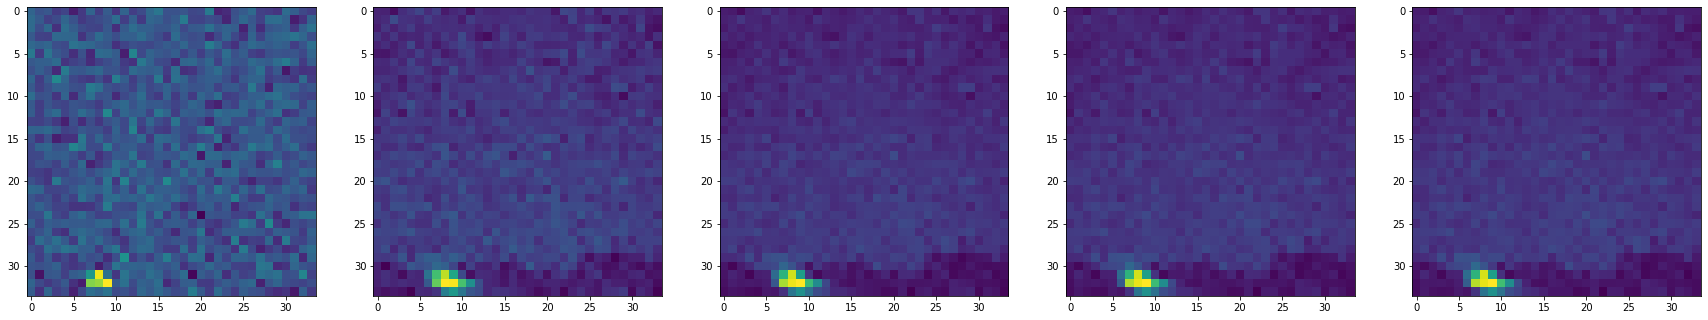

In [129]:
#@title H -> m<n

resized = cv2.resize(gray, (34, 34), interpolation=cv2.INTER_AREA)
x = resized.reshape(1, -1).T.astype(np.double)/255
H = np.random.uniform(0, 1, size=(32**2, 34**2))
Y = (H@x)
rho = [1,2,3,4,10]
lmba = 0.1

plt.figure(figsize=(30,10))
for i in range(5):
  recuperada = admm(H, Y, rho[i], lmba, 10,34**2)
  recuperada = recuperada.reshape(34, 34)
  plt.subplot(1,5,i+1)
  plt.imshow(recuperada)  

#Noise case

rho = [1,0.5,0.1,0.01,0.001,0.0001]


lmba = 0.1

iteraciones = 10

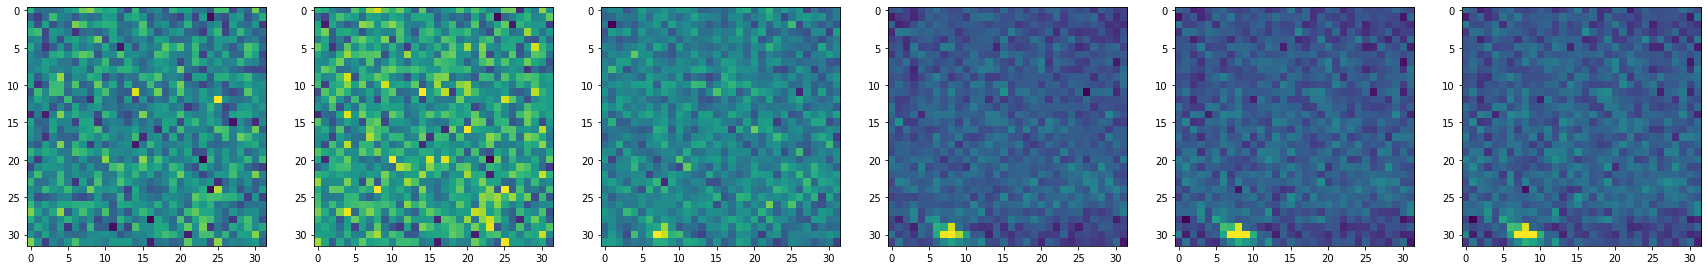

In [150]:
#@title H -> m=n

resized = cv2.resize(gray, (32, 32), interpolation=cv2.INTER_AREA)
x = resized.reshape(1, -1).T.astype(np.double)/255
H = np.random.uniform(0, 1, size=(32**2, 32**2))
Y = (H@x) + np.random.normal(0,25,1)
rho = [1,0.5,0.1,0.01,0.001,0.0001]
lmba = 0.1

plt.figure(figsize=(30,10))
for i in range(len(rho)):
  recuperada = admm(H, Y, rho[i], lmba, 10,32**2)
  recuperada = recuperada.reshape(32, 32)
  plt.subplot(1,len(rho),i+1)
  plt.imshow(recuperada)

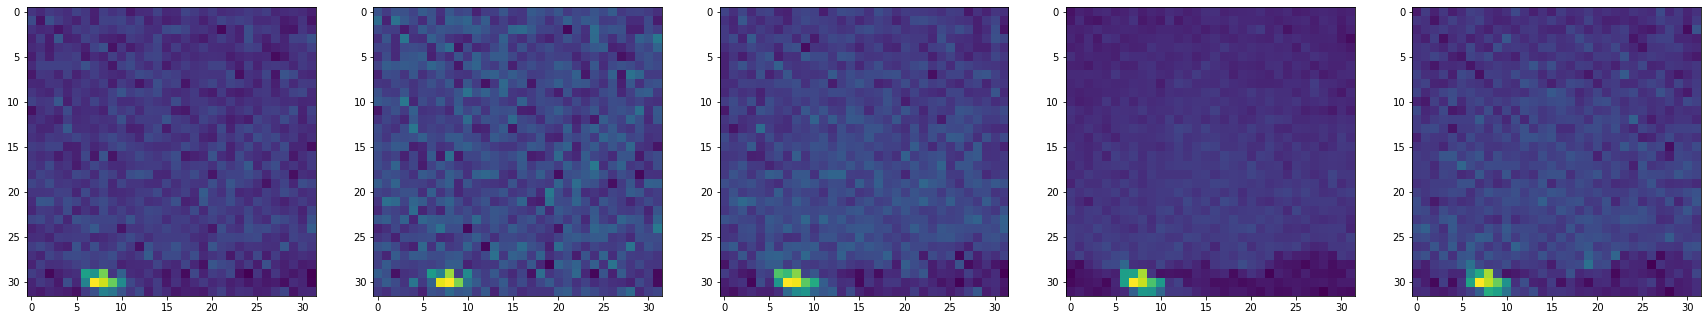

In [149]:
#@title H -> m>n
resized = cv2.resize(gray, (32, 32), interpolation=cv2.INTER_AREA)
x = resized.reshape(1, -1).T.astype(np.double)/255
H = np.random.uniform(0, 1, size=(38**2, 32**2))
Y = (H@x) + np.random.normal(0,25,1)
rho = [1,0.5,0.1,0.01,0.001,0.0001]
lmba = 0.1

plt.figure(figsize=(30,10))
for i in range(5):
  recuperada = admm(H, Y, rho[i], lmba, 10,32**2)
  recuperada = recuperada.reshape(32, 32)
  plt.subplot(1,5,i+1)
  plt.imshow(recuperada)

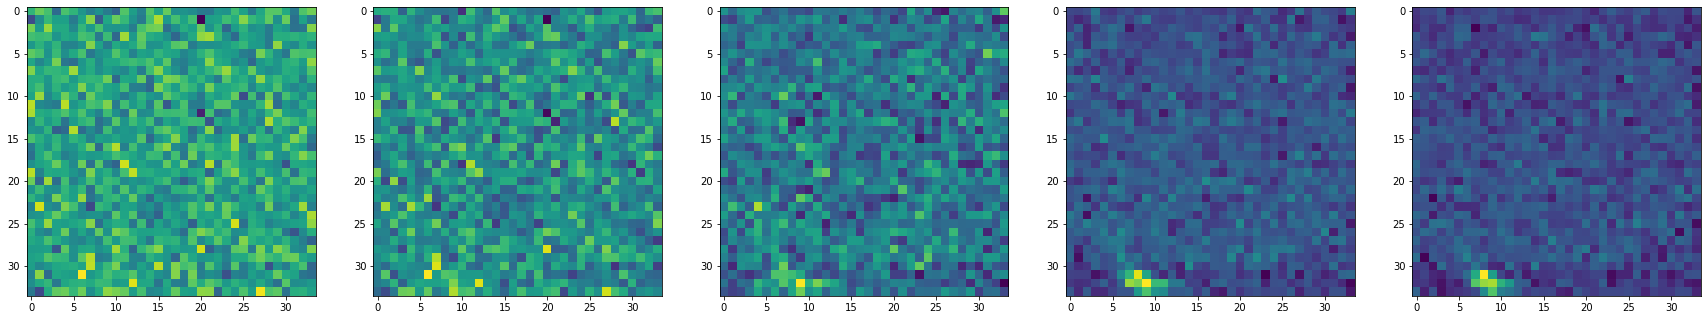

In [151]:
#@title H -> m<n

resized = cv2.resize(gray, (34, 34), interpolation=cv2.INTER_AREA)
x = resized.reshape(1, -1).T.astype(np.double)/255
H = np.random.uniform(0, 1, size=(32**2, 34**2))
Y = (H@x) + np.random.normal(0,25,1)
rho = [1,0.5,0.1,0.01,0.001,0.0001]
lmba = 0.1

plt.figure(figsize=(30,10))
for i in range(5):
  recuperada = admm(H, Y, rho[i], lmba, 10,34**2)
  recuperada = recuperada.reshape(34, 34)
  plt.subplot(1,5,i+1)
  plt.imshow(recuperada)  